In [4]:
!pip install pyspark

from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.master("local[*]").getOrCreate()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=a66cf2d81f6cd7c15fd9ce1cba75ef1a32ba80e22b7cb76db1fcba64e6c97578
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Reading the given CSV file
df = spark.read.csv('/content/drive/MyDrive/BostonHousing.csv',
                    header=True,
                    inferSchema=True)

#  Show the first 5 elements of your dataset
df.show(5)


+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [7]:
# Count number of observation in the given dataset
df.count()

506

In [8]:
# Show the Schema of your dataset
df.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [11]:
# Drop the column "b" from your dataset

df = df.drop('b')

In [9]:
#  round to 2 decimal places
from pyspark.sql.functions import round
# Check the data type of a column
df.select('crim').printSchema()

# Round a double column to 2 decimal places
df = df.withColumn('crim', round(df['crim'], 2))
df.select('crim').show(5)
df.head(5)


root
 |-- crim: double (nullable = true)

+----+
|crim|
+----+
|0.01|
|0.03|
|0.03|
|0.03|
|0.07|
+----+
only showing top 5 rows



[Row(crim=0.01, zn=18.0, indus=2.31, chas=0, nox=0.538, rm=6.575, age=65.2, dis=4.09, rad=1, tax=296, ptratio=15.3, b=396.9, lstat=4.98, medv=24.0),
 Row(crim=0.03, zn=0.0, indus=7.07, chas=0, nox=0.469, rm=6.421, age=78.9, dis=4.9671, rad=2, tax=242, ptratio=17.8, b=396.9, lstat=9.14, medv=21.6),
 Row(crim=0.03, zn=0.0, indus=7.07, chas=0, nox=0.469, rm=7.185, age=61.1, dis=4.9671, rad=2, tax=242, ptratio=17.8, b=392.83, lstat=4.03, medv=34.7),
 Row(crim=0.03, zn=0.0, indus=2.18, chas=0, nox=0.458, rm=6.998, age=45.8, dis=6.0622, rad=3, tax=222, ptratio=18.7, b=394.63, lstat=2.94, medv=33.4),
 Row(crim=0.07, zn=0.0, indus=2.18, chas=0, nox=0.458, rm=7.147, age=54.2, dis=6.0622, rad=3, tax=222, ptratio=18.7, b=396.9, lstat=5.33, medv=36.2)]

In [12]:
# Create a new column (Age10)  with 10% increasing of 'age' column
df = df.withColumn('Age10', df['age'] * 1.1)
df.show(5)


+----+----+-----+----+-----+-----+----+------+---+---+-------+-----+----+------------------+
|crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|lstat|medv|             Age10|
+----+----+-----+----+-----+-----+----+------+---+---+-------+-----+----+------------------+
|0.01|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 4.98|24.0| 71.72000000000001|
|0.03| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 9.14|21.6|             86.79|
|0.03| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8| 4.03|34.7| 67.21000000000001|
|0.03| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7| 2.94|33.4|             50.38|
|0.07| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 5.33|36.2|59.620000000000005|
+----+----+-----+----+-----+-----+----+------+---+---+-------+-----+----+------------------+
only showing top 5 rows



/usr/local/lib/python3.10/dist-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


<Axes: ylabel='Frequency'>

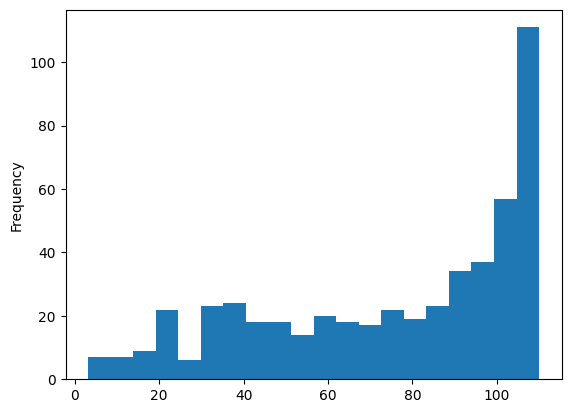

In [ ]:
# Plot histogram Age10 column on a 2D Plot using pyspark.pandas

import pyspark.pandas as ps

pdf = df.toPandas()

pdf.Age10.plot.hist(bins=20)


In [13]:
# Provide Summary Statistics of all columns

df.describe().show()

+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|                nox|                rm|               age|              dis|              rad|               tax|           ptratio|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|                506|               506|               506|              506|              

In [15]:
# Convert  Spark Dataframe to Pandas Dataframe
pandas_df = df.toPandas()


In [16]:
# Show the last 5 rows of Pandas DataFrame

pandas_df.tail(5)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,Age10
501,0.06,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,76.01
502,0.05,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,84.37
503,0.06,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,100.10
504,0.11,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,98.23
505,0.05,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9,88.88
